# Cutface Creek stratigraphy compilation using Pystrat

In [1]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
# pystrat
from pystrat import pystrat

## import strat data

In [2]:
# read in your lithostratigraphy data
strat = pd.read_csv('../data/strat/strat.csv')
# color = pd.read_csv('../data/strat/color.csv')
# width = pd.read_csv('../data/strat/width.csv')

display(strat.head())
# display(color.head())
# display(width.head())

,thickness,lithology,grain size,structure,note
0,3.2,basalt,igneous,NaN,massive
1,3.9,basalt,igneous,NaN,amygdaoidal
2,0.6,basalt,igneous,NaN,NaN
3,0.9,conglomerate,C,NaN,NaN
4,1.7,arkose,M,ripple,NaN


In [3]:
strat.lithology.unique()

array(['basalt', 'conglomerate', 'arkose', 'cover', 'sandstone', 'tuff',
       'siltstone'], dtype=object)

In [4]:
strat['grain size'].unique()

array(['igneous', 'C', 'M', 'cover', 'F', 'VF'], dtype=object)

In [5]:
lithology = ['basalt', 'conglomerate', 'arkose', 'cover', 'sandstone', 'siltstone', 'tuff']
color = ['grey', 'darkorange', 'orange', 'white', 'yellow', 'peru', 'lightgrey']
color_chart = pd.Series(index=lithology, data = color)
color_chart

basalt                grey
conglomerate    darkorange
arkose              orange
cover                white
sandstone           yellow
siltstone             peru
tuff             lightgrey
dtype: object

In [6]:
grain_size = ['igneous', 'C', 'M', 'cover', 'F', 'VF']
widths = [1, 0.8, 0.6, 0, 0.4, 0.2]
width_chart = pd.Series(index=grain_size, data = widths)
width_chart

igneous    1.0
C          0.8
M          0.6
cover      0.0
F          0.4
VF         0.2
dtype: float64

In [7]:
strat['color'] = [color_chart[i] for i in strat['lithology']]
strat['width'] = [width_chart[i] for i in strat['grain size']]
strat.head(10)

,thickness,lithology,grain size,structure,note,color,width
0,3.2,basalt,igneous,NaN,massive,grey,1.0
1,3.9,basalt,igneous,NaN,amygdaoidal,grey,1.0
2,0.6,basalt,igneous,NaN,NaN,grey,1.0
3,0.9,conglomerate,C,NaN,NaN,darkorange,0.8
4,1.7,arkose,M,ripple,NaN,orange,0.6
5,0.6,cover,cover,NaN,NaN,white,0.0
6,1.0,arkose,M,NaN,NaN,orange,0.6
7,0.7,cover,cover,NaN,NaN,white,0.0
8,3.4,arkose,F,NaN,NaN,orange,0.4
9,0.2,arkose,M,trough x-bed,NaN,orange,0.6


## rough strat column

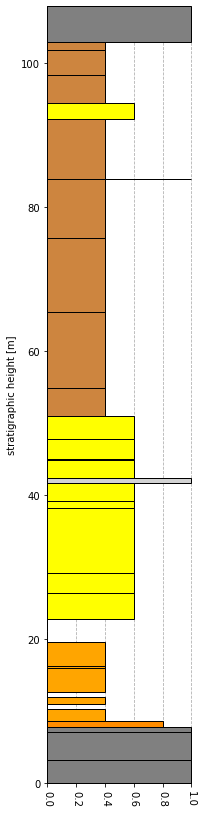

In [8]:
# create a pystrat Section from the lithostratigraphy data
section = pystrat.Section(strat['thickness'], strat['lithology'])

# create a pystrat Style from the styling files
style = pystrat.Style('facies',strat['lithology'],strat['color'],
                         'facies',strat['lithology'],strat['width'],
                         0.1, 2)

# plot the Section using the Style
fig, ax = pystrat.plot_stratigraphy(section, style)
# ax.set_xlabel(['VF', 'F', 'M', 'C'])
plt.show(fig)

## 

## add specimen strat level info

In [9]:
specimen_level = pd.read_csv('../data/specimen_strat_height.csv')
specimen_level.head()

,sample_name,strat_level
0,1a,1.1
1,2a,1.5
2,3a,1.8
3,4a,2.2
4,5a,2.6


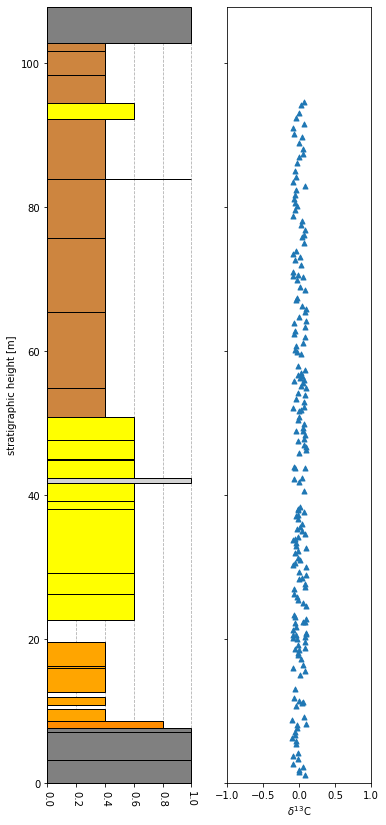

In [10]:

fig, ax = pystrat.plot_stratigraphy(section, style, ncols = 2)

ax[1].scatter(np.zeros(len(specimen_level['strat_level']))+np.random.uniform(low=-1, high=1, size=len(specimen_level['strat_level']))/10, specimen_level['strat_level'], 25, marker = '^')
ax[1].set_xlim(-1,1)
ax[1].set_xlabel('$\delta^{13}$C')

plt.show()